In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [5]:
mp = pd.read_csv('~/Downloads/ESCO_MGX_VS_MTX.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,s__Acidaminococcaceae_unclassified_SGB5785,s__Acidaminococcus_intestini,s__Actinomyces_urogenitalis,s__Adlercreutzia_equolifaciens,s__Agathobaculum_butyriciproducens,s__Aggregatibacter_segnis,s__Akkermansia_muciniphila,s__Akkermansia_sp_BIOML_A40,s__Akkermansia_sp_KLE1605,s__Alistipes_communis,...,s__Varibaculum_SGB15480,s__Veillonella_atypica,s__Veillonella_dispar,s__Veillonella_parvula,s__Veillonella_ratti,s__Veillonella_rogosae,s__Veillonella_seminalis,s__Victivallales_bacterium,s__Victivallis_vadensis,Diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
PSM7J14T,0.0,0.000000,0.0,0.000000,6.851839,0.0,0.000000,0.0,0.000000,28.202540,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,CD
CSM79HOL,0.0,0.000000,0.0,0.000000,8.558675,0.0,0.000000,0.0,0.000000,10.125522,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,CD
CSM67U9D,0.0,0.000000,0.0,0.000000,37.769374,0.0,0.000000,0.0,0.000000,9.424019,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,CD
HSM7J4N4,0.0,0.000000,0.0,0.000000,33.208078,0.0,0.000000,0.0,0.000000,194.298516,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,CD
CSM79HJS,0.0,0.000000,0.0,0.000000,21.670128,0.0,0.000000,0.0,0.000000,194.298516,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSM7J4R2,0.0,0.043425,0.0,3.558248,0.162435,0.0,0.340896,0.0,0.535219,10.923160,...,0.0,0.0,5044.205479,0.0,0.0,0.0,0.0,0.0,8.010331,Control
MSM79H9A,0.0,0.043425,0.0,6.306147,0.060697,0.0,2.729078,0.0,0.535219,1.478479,...,0.0,0.0,49.679843,0.0,0.0,0.0,0.0,0.0,8.010331,Control
HSM7J4KK,0.0,15.403279,0.0,6.306147,0.439256,0.0,1.370526,0.0,0.535219,3.838015,...,0.0,0.0,49.679843,0.0,0.0,0.0,0.0,0.0,8.010331,Control


In [11]:
select_sampels_MGX = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels_MTX = pd.read_csv('~/Desktop/selected_samples_MTX.csv')
select_sampels_MGX = select_sampels_MGX.set_index('External ID')
select_sampels_MTX = select_sampels_MTX.set_index('External ID')
select_sampels_MGX.drop("Participant ID", inplace=True, axis=1)
select_sampels_MTX.drop("Participant ID", inplace=True, axis=1)

# select_sampels = pd.concat([select_sampels_MGX,select_sampels_MTX])
# select_sampels = pd.read_csv('~/Desktop/fecalcal_higher.csv')
# select_sampels = select_sampels.set_index('External ID')
# select_sampels.drop(["Participant ID","Unnamed: 0"], inplace=True, axis=1)
select_sampels_MTX

,fecalcal_max,Diagnosis
External ID,,
CSM67UA2,37.17836,CD
CSM5MCVN,16.32450,CD
CSM67UBZ,12.70000,UC
CSM5MCXL,70.91411,UC
CSM5MCY8,232.60620,UC
...,...,...
PSM7J19F,263.01820,CD
PSM7J19N,13.47861,nonIBD
PSM7J17X,16.97915,nonIBD


In [12]:
mp = mp.loc[select_sampels_MTX.index,:]
# mp = mp.merge(select_sampels, how='inner', left_index=True, right_index=True)
# mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels_MTX.iloc[:,-1]
# mp.to_csv("~/Desktop/Metaphlan3_to_cox.csv")
mp

,s__Absiella_dolichum:1,s__Absiella_innocuum:1,s__Absiella_sp000163515:1,s__Acetatifactor_sp003447295:1,s__Acetatifactor_sp900066365:1,s__Acetatifactor_sp900066365:2,s__Acetatifactor_sp900066565:1,s__Acidaminococcus_intestini:1,s__Acidaminococcus_massiliensis:1,s__Acutalibacter_sp000435395:1,...,s__esco_HumanRef_tmp_v1.0.1_936,s__esco_HumanRef_tmp_v1.0.1_96,s__esco_HumanRef_tmp_v1.0.1_961,s__esco_HumanRef_tmp_v1.0.1_966,s__esco_HumanRef_tmp_v1.0.1_968,s__esco_HumanRef_tmp_v1.0.1_973,s__esco_HumanRef_tmp_v1.0.1_989,s__esco_HumanRef_tmp_v1.0.1_998,Diagnosis,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,1.0,1.000000,0.916667,0.083333,0.000000,5.000000,0.333333,0.000000,0.0,3.500000,...,0.0,0.000000,0.0,0.0,0.0,34.500000,0.00000,347.5,CD,CD
CSM5MCVN,0.0,1.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.388997,4.0,0.000000,...,0.0,0.333333,0.0,0.0,0.0,33.500000,0.00000,581.0,CD,CD
CSM67UBZ,0.0,1.333333,1.869565,0.000000,0.000000,0.066667,0.000000,0.955614,0.0,1.777778,...,5.0,0.000000,0.0,1.0,0.0,298.500000,1.00000,0.0,UC,UC
CSM5MCXL,1.0,2.500000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.0,2.000000,...,0.0,0.000000,0.0,0.0,0.0,13.000000,2.00000,119.0,UC,UC
CSM5MCY8,3.0,2.500000,0.863636,0.000000,0.000000,1.000000,0.041667,0.111111,0.0,2.000000,...,1.0,0.222222,0.0,0.5,0.5,96.333333,0.37037,11.0,UC,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19F,0.0,0.666667,0.672515,0.263158,0.000000,0.125000,0.083333,0.429348,1.0,2.666667,...,0.0,2.500000,0.0,0.0,42.0,2.333333,1.00000,78.5,CD,CD
PSM7J19N,0.0,0.500000,0.142857,0.454545,0.203704,0.432836,0.266501,0.333333,0.0,2.000000,...,3.0,14.333333,0.0,5.0,13.0,5.000000,0.00000,69.0,Control,nonIBD
PSM7J17X,0.0,0.694286,0.333333,0.142857,0.000000,0.833333,0.007246,40.000000,0.0,1.140459,...,0.0,11.666667,0.0,4.0,0.0,0.000000,0.00000,0.0,Control,nonIBD


In [13]:
MTX_X = mp.iloc[:,1:918]
MTX_y = mp.iloc[:,-1]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.40, random_state=42)

Best Model:
RandomForestClassifier(max_features=4, min_samples_split=5, random_state=100)


<AxesSubplot:>

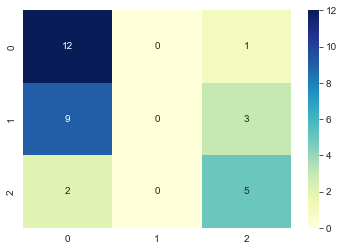

In [17]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=100)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
cm_RF = confusion_matrix(y_test, RF_predictions)
cm_RF
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='diagnosis', ylabel='row_0'>

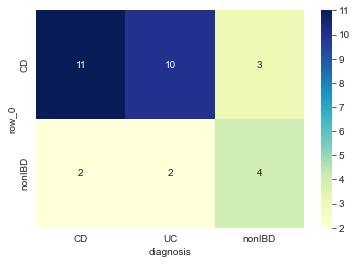

In [18]:
mod2 = RandomForestClassifier()

mod2.fit(X_train,y_train)

pred2 = mod2.predict(X_test)
cm_RF_ = pd.crosstab(pred2, y_test)

sns.heatmap(cm_RF_, cmap="YlGnBu", annot=True)

In [19]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, RF_predictions))

Accuracy 0.53125
